In [2]:
cd 


/Users/ness001


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv(r'/Users/ness001/ds/notebooks/MERGE.csv',index_col=0)

## a glimspe of data

In [5]:
df.sample(3)

,TS股票代码,报告期,基本每股收益,期末总股本,资本公积金 (元，下同),未分配利润,盈余公积金,货币资金,应收票据,应收账款,其他应收款,预付款项,存货,其他流动资产,流动资产合计,...,货币(M1)供应量同比增长率,流通中现金(M0)供应量同比增长率,社会消费品零售总额_同比增长,城镇社会消费品零售总额_同比增长,城镇社会消费品零售总额_累计增长,乡村社会消费品零售总额_同比增长,乡村社会消费品零售总额_累计增长,消费者预期指数,消费者满意指数,消费者信心指数,工业增加值_同比增长,工业增加值_累计增长,农业产量,同期上证涨跌幅,同期深证涨跌幅
17246,600416.SH,2012/12/31,-0.3500,608.4845,1035.2449,262.7057,169.4727,1752.3480,427.5569,5082.5729,127.3617,194.9321,2941.8785,31.1450,10527.4712,...,6.0333,9.6333,14.8667,14.90,14.2000,14.8333,14.4333,108.7667,104.9667,99.2000,10.0000,10.0000,100.30,0.0948,0.0625
14052,600141.SH,2014/6/30,0.0451,435.3900,1882.1729,859.6581,175.1611,1099.5595,257.1587,951.8735,121.7148,167.0373,834.3230,158.3383,3590.0050,...,6.7000,5.8000,12.2929,12.11,11.8909,13.4781,13.0645,107.3000,101.8333,100.9667,8.9000,8.7333,100.30,0.0074,0.0213
20866,600750.SH,2009/6/30,0.1723,295.8768,195.1233,309.1973,100.9736,227.1061,61.1415,35.9447,147.2977,20.0803,93.7288,0.0138,585.3130,...,20.3333,11.3333,15.0000,15.00,15.0000,15.0000,15.0000,100.0000,100.9000,102.1667,8.9667,6.2667,93.39,0.2307,0.2659


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26458 entries, 0 to 26457
Columns: 143 entries, TS股票代码 to 同期深证涨跌幅
dtypes: float64(140), object(3)
memory usage: 29.1+ MB


In [7]:
df['TS股票代码'].nunique()

687

In [8]:
df['roe']=df['净利润 (元，下同)']/df['股东权益合计(含少数股东权益)']

## 实验目的
预测未来两年某公司的盈亏情况以及营业收入具体数值

## 截面数据
    浙江华峰氨纶股份有限公司成立于1999年12月,是华峰集团控股子公司,公司专业从事氨纶纤维的生产、销售和技术开发,生产规模居全球氨纶制造企业前列,是国家火炬计划重点高新技术企业、全国化纤行业竞争力十强企业、首批全国资源节约型和环境友好型试点企业、首届中国工业行业履行社会责任五星级企业。2006年,公司成功实现A股上市,成为温州首家国内上市民营企业和全国首家主营氨纶上市公司。
经营范围 	氨纶产品的加工制造、销售、技术开发(涉及许可证经营的凭许可证经营),以及代理氨纶相关设备及产品的进出口业务。 

以002064.SZ为例子

In [9]:
df1=df[df['TS股票代码']=='002064.SZ']

In [10]:
df1.columns.tolist()#存货，固定资产，负债合计， '息税前利润','流动比率','速动比率'，'现金比率'

['TS股票代码',
 '报告期',
 '基本每股收益',
 '期末总股本',
 '资本公积金 (元，下同)',
 '未分配利润',
 '盈余公积金',
 '货币资金',
 '应收票据',
 '应收账款',
 '其他应收款',
 '预付款项',
 '存货',
 '其他流动资产',
 '流动资产合计',
 '长期股权投资',
 '固定资产',
 '在建工程',
 '无形资产',
 '长期待摊费用',
 '递延所得税资产',
 '非流动资产合计',
 '资产总计',
 '长期借款',
 '短期借款',
 '应付票据',
 '应付账款',
 '预收款项',
 '应付职工薪酬',
 '应交税费',
 '应付利息',
 '其他应付款',
 '流动负债合计',
 '非流动负债合计',
 '负债合计',
 '少数股东权益',
 '股东权益合计(不含少数股东权益)',
 '股东权益合计(含少数股东权益)',
 '负债及股东权益总计',
 '销售商品、提供劳务收到的现金',
 '收到的税费返还',
 '收到其他与经营活动有关的现金',
 '经营活动现金流入小计',
 '购买商品、接受劳务支付的现金',
 '支付给职工以及为职工支付的现金',
 '支付的各项税费',
 '支付其他与经营活动有关的现金',
 '经营活动现金流出小计',
 '经营活动产生的现金流量净额',
 '收回投资收到的现金',
 '取得投资收益收到的现金',
 '处置固定资产、无形资产和其他长期资产收回的现金净额',
 '投资活动现金流入小计',
 '购建固定资产、无形资产和其他长期资产支付的现金',
 '投资支付的现金',
 '投资活动现金流出小计',
 '投资活动产生的现金流量净额',
 '取得借款收到的现金',
 '筹资活动现金流入小计',
 '企业自由现金流量',
 '偿还债务支付的现金',
 '分配股利、利润或偿付利息支付的现金',
 '支付其他与筹资活动有关的现金',
 '筹资活动现金流出小计',
 '筹资活动产生的现金流量净额',
 '汇率变动对现金的影响',
 '现金及现金等价物净增加额',
 '期初现金及现金等价物余额',
 '期末现金及现金等价物余额',
 '收到其他与投资活动有关的现金',
 '支付其他与投资活动有关的现金',
 '收到其他与筹资活动有关的现金',
 '其中:子公司支付给少数股东

In [11]:
df1.shape

(42, 144)

In [12]:
df1=df1.reset_index(drop=True)

### 时间特征

In [13]:
import time

In [14]:
df1['报告期']=pd.to_datetime(df1['报告期'])

In [15]:
df1['季度']=df1['报告期'].dt.quarter

In [16]:
df1['年']=df1['报告期'].dt.year

## eda

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Windows\\Fonts\\simhei.ttf'

In [30]:
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

### 小提琴图

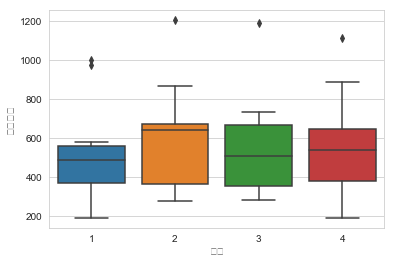

In [31]:
sns.boxplot(x='季度',y='营业收入',data=df1)

In [32]:
quarter4=df1[df1['季度']==4]

### 核密度估计图

In [33]:
from scipy.stats import norm

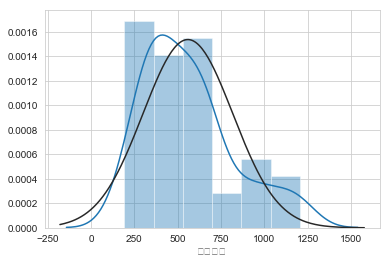

In [34]:
sns.distplot(df1['营业收入'],fit=norm,kde=True)

#### 正态性检验

In [35]:
from scipy import stats

In [36]:
stats.normaltest(df1['营业收入'])#拒绝原假设，不是

NormaltestResult(statistic=6.404708355674026, pvalue=0.04066635536777723)

## 折线图

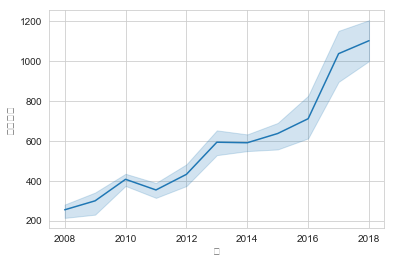

In [37]:
sns.lineplot(x='年',y='营业收入',data=df1)

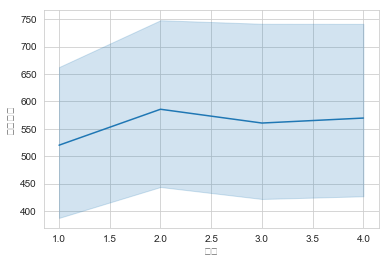

In [38]:
sns.lineplot(x='季度',y='营业收入',data=df1)

#### 对数差分

为了方便在后面的时间序列过程中进行建模，我们做一个对数变换，减少异方差性，再做一个差分变换，去除趋势性。

/Users/ness001/anaconda3/envs/pytorch/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



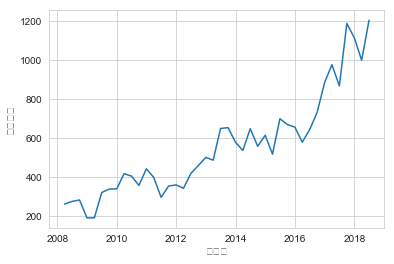

In [39]:
sns.lineplot(x='报告期',y='营业收入',data=df1)

In [40]:
df1['log']=np.log(df1['营业收入'])

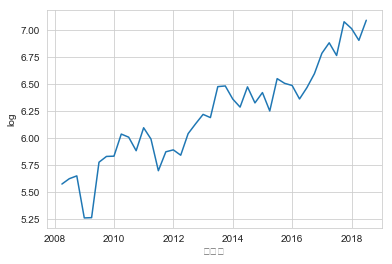

In [41]:
sns.lineplot(x='报告期',y='log',data=df1)

In [42]:
df1['logdiff']=df1['log'].diff()

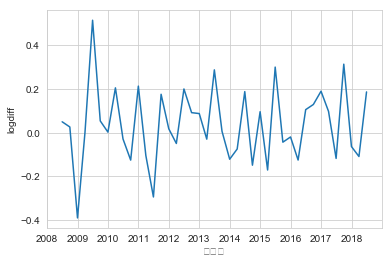

In [43]:
sns.lineplot(x='报告期',y='logdiff',data=df1)

## 如何处理大量变量？

通过相关矩阵检查变量之间信息是否重复，我们发现许多变量之间信息重复较多。

初步考虑三种方法，
第一种对变量进行聚类分析，然后再与相应变量之间做一个相关性分析，缺点在于需要自己判断哪些变量是需要纳入模型中的
第二种PCA主成分分析，选取方差较大的前几个，缺点在于得到的主成分含义没有直观上那么清楚、
第三种是直接使用基于模型内部的变量选择工具，比如时间序列模型中使用bic准则进行变量选择，机器学习模型中的xgbosst的model selection

### heatmap

In [44]:
var_corr=df1.drop(['营业收入','营业总收入 (元，下同)','加:营业外收入','log','logdiff','报告期','年'],axis=1).corr()

In [45]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})

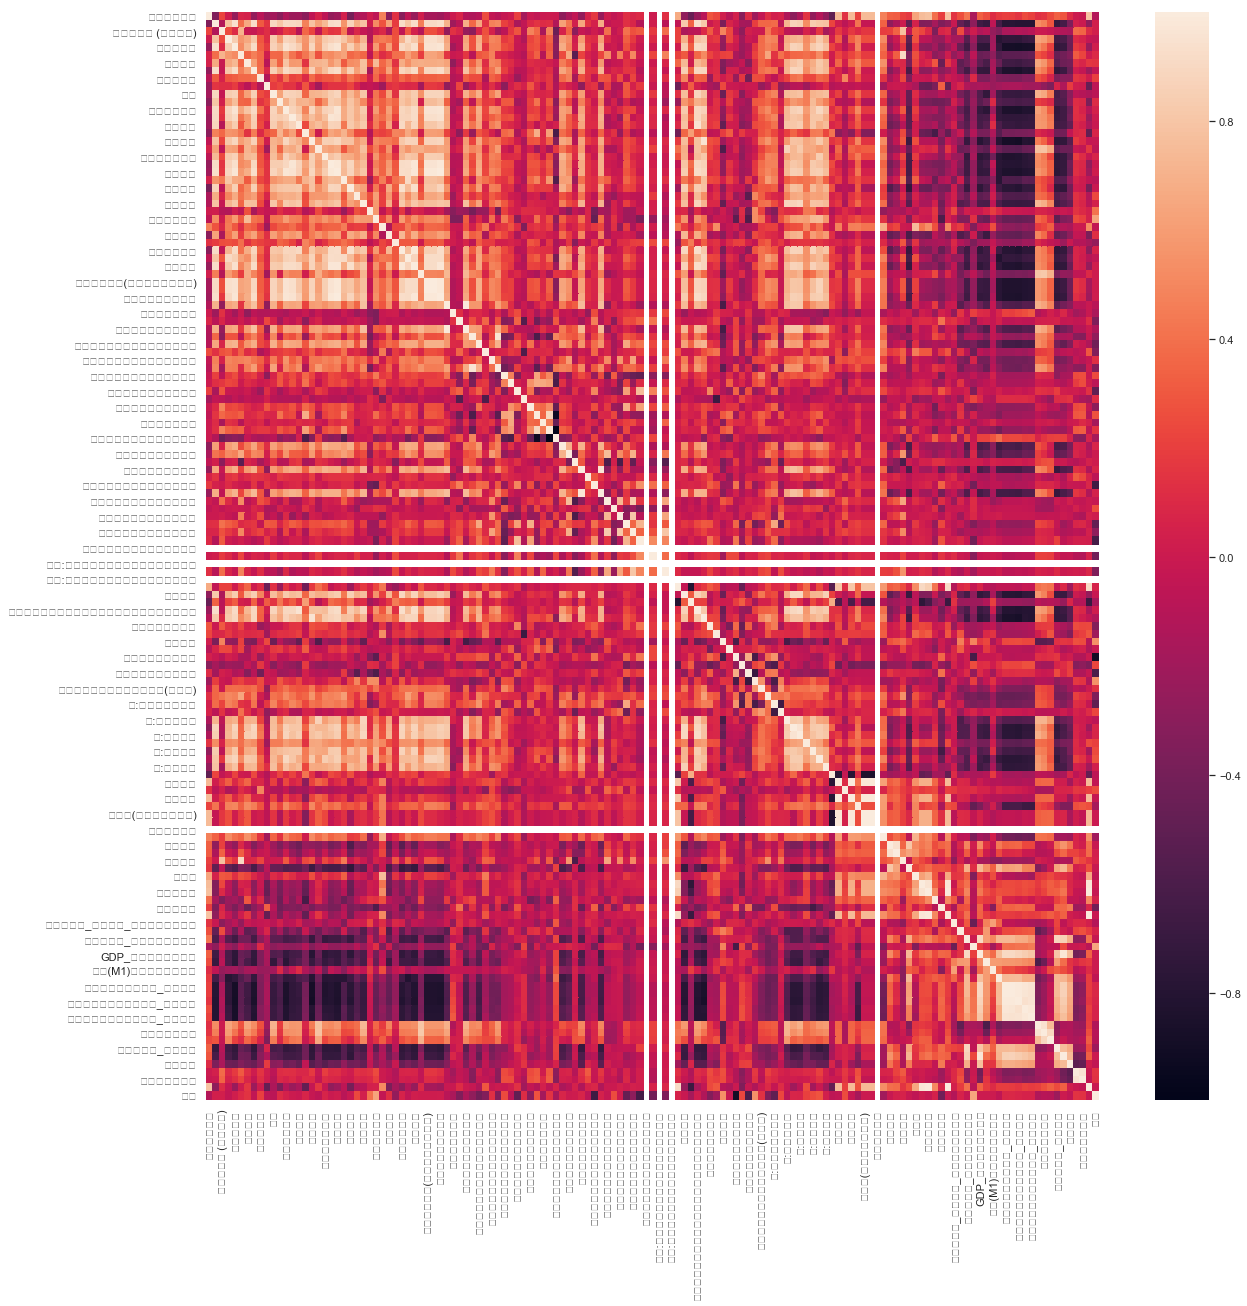

In [46]:
sns.heatmap(var_corr,annot=False)#可见解释变量间信息重复较高

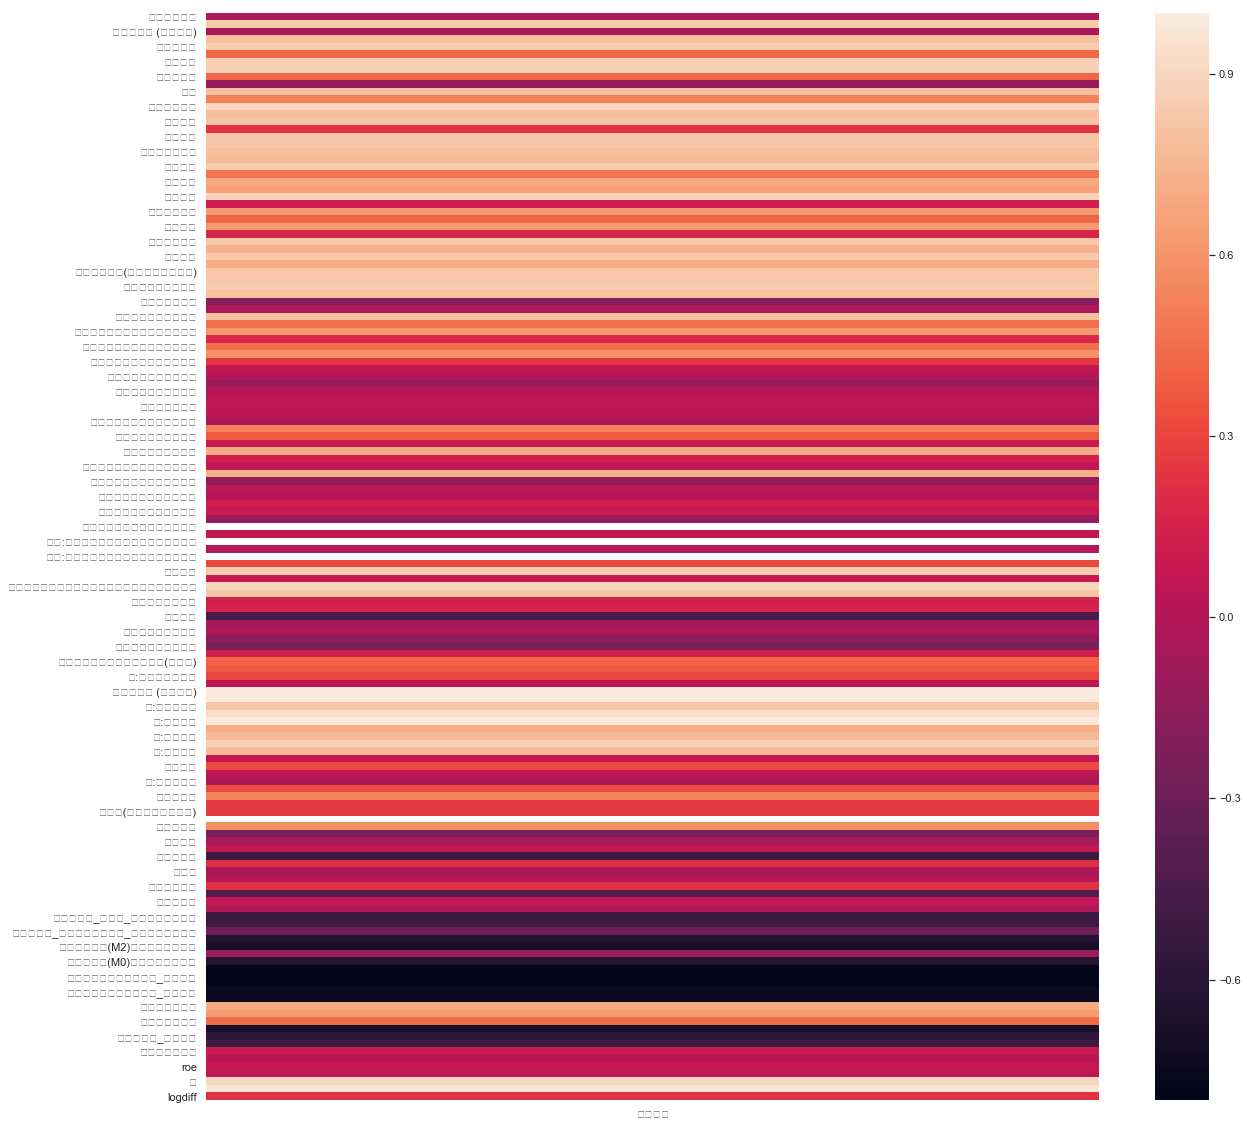

In [47]:
sns.heatmap(df1.corr()[['营业收入']],annot=False)#从下图可以看出，营业收入和资产负债表诸多信息相关性较高

然而相关系数刻画的是线性相关性，所以这个相关性系数热图只能拿来作为参考而无法得出结论。

因为变量间信息重复程度较高，因此接下来我们分别使用聚类分析，主成分分析以及时间序列建模和机器学习建模来进一步探究。

### 构造类别变量，反应不同水平的经营情况

In [48]:
labels=[-1,0,1]#填补蚊子

In [49]:
df1['diff_rate']=(df1['营业收入'].diff())/df1['营业收入'].shift()

In [50]:
df1[['营业收入','diff_rate']].head(3)

,营业收入,diff_rate
0,263.1404,NaN
1,276.5708,0.051039
2,283.8601,0.026356


In [51]:
cutted=pd.cut(df1['diff_rate'],3,labels=labels)

In [52]:
df1['diff_en']=cutted

## 聚类分析

In [53]:
df1.to_csv('F:\data\stock.csv',encoding='utf-8')

使用jmp软件进行变量聚类，在聚类的时候注意剔除 【xx收入】以及类别变量
需要查询概念【解释变异的比例】
我们可以发现按照解释变异的比例排序，与常识相反，流动比率速动比率没有想象的那么重要。
这里有很多话可以讲。我就先不讲了，写报告的同学多多调查下(*^▽^*)

## 使用PCA进行降维

聚类分析中我们得到了21个类，这21个聚类成分也可以作为某种意义上的“主成分”来作为建模的解释变量。但是我们在这里还是选择主流的主成分分析法进行降维。

In [54]:
df2=df1.drop(['营业总收入 (元，下同)','加:营业外收入','log','报告期','diff_rate','TS股票代码'],axis=1)

In [55]:
df2.columns.tolist()

['基本每股收益',
 '期末总股本',
 '资本公积金 (元，下同)',
 '未分配利润',
 '盈余公积金',
 '货币资金',
 '应收票据',
 '应收账款',
 '其他应收款',
 '预付款项',
 '存货',
 '其他流动资产',
 '流动资产合计',
 '长期股权投资',
 '固定资产',
 '在建工程',
 '无形资产',
 '长期待摊费用',
 '递延所得税资产',
 '非流动资产合计',
 '资产总计',
 '长期借款',
 '短期借款',
 '应付票据',
 '应付账款',
 '预收款项',
 '应付职工薪酬',
 '应交税费',
 '应付利息',
 '其他应付款',
 '流动负债合计',
 '非流动负债合计',
 '负债合计',
 '少数股东权益',
 '股东权益合计(不含少数股东权益)',
 '股东权益合计(含少数股东权益)',
 '负债及股东权益总计',
 '销售商品、提供劳务收到的现金',
 '收到的税费返还',
 '收到其他与经营活动有关的现金',
 '经营活动现金流入小计',
 '购买商品、接受劳务支付的现金',
 '支付给职工以及为职工支付的现金',
 '支付的各项税费',
 '支付其他与经营活动有关的现金',
 '经营活动现金流出小计',
 '经营活动产生的现金流量净额',
 '收回投资收到的现金',
 '取得投资收益收到的现金',
 '处置固定资产、无形资产和其他长期资产收回的现金净额',
 '投资活动现金流入小计',
 '购建固定资产、无形资产和其他长期资产支付的现金',
 '投资支付的现金',
 '投资活动现金流出小计',
 '投资活动产生的现金流量净额',
 '取得借款收到的现金',
 '筹资活动现金流入小计',
 '企业自由现金流量',
 '偿还债务支付的现金',
 '分配股利、利润或偿付利息支付的现金',
 '支付其他与筹资活动有关的现金',
 '筹资活动现金流出小计',
 '筹资活动产生的现金流量净额',
 '汇率变动对现金的影响',
 '现金及现金等价物净增加额',
 '期初现金及现金等价物余额',
 '期末现金及现金等价物余额',
 '收到其他与投资活动有关的现金',
 '支付其他与投资活动有关的现金',
 '收到其他与筹资活动有关的现金',
 '其中:子公司支付给少数股东的股利、利润',
 '吸收投资收到的现

In [56]:
from sklearn.decomposition import PCA#以之前的变量聚类结果作为指示，以0.02作为threshold，我们在这里选择13个主成分

In [57]:
pca=PCA(n_components=13)

In [74]:
components=pca.fit_transform(df2.drop(['logdiff','营业收入','diff_en','season'],axis=1))

In [75]:
pdf=pd.DataFrame(data=components,columns=['p1','p2','p3','p4','p5','p6','p7','p8','p9','p10','p11','p12','p13'])

In [76]:
pdf.head(3)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13
0,-3018.511935,295.586981,-319.918202,-280.688152,77.043393,53.881122,245.091070,-223.384244,-71.480144,385.213618,-131.346423,-118.170042,-67.485452
1,-2998.775060,-8.163230,-280.194842,27.396570,239.266622,-94.942256,172.839894,-26.075594,-210.939299,179.784525,229.619935,21.077975,-40.834356
2,-2843.186563,30.471180,-169.002169,-131.556783,222.311807,-20.715246,42.287714,-104.208739,-81.969855,175.545351,160.296580,18.339350,43.069855


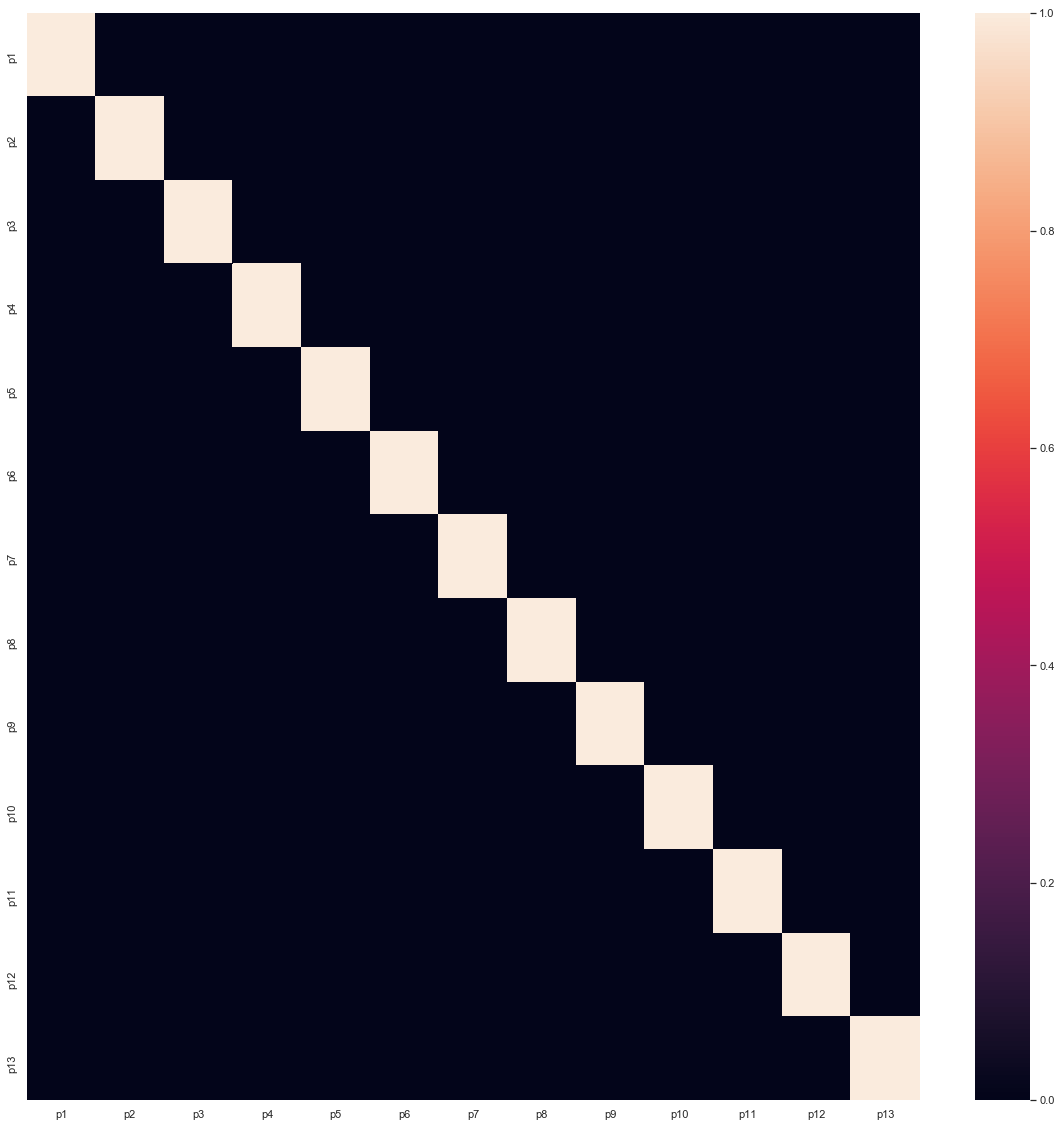

In [77]:
sns.heatmap(pdf.corr(),annot=False)

In [78]:
data=pd.concat([pdf,df2[['diff_en']]],axis=1)

In [79]:
data.head(3)

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,diff_en
0,-3018.511935,295.586981,-319.918202,-280.688152,77.043393,53.881122,245.091070,-223.384244,-71.480144,385.213618,-131.346423,-118.170042,-67.485452,NaN
1,-2998.775060,-8.163230,-280.194842,27.396570,239.266622,-94.942256,172.839894,-26.075594,-210.939299,179.784525,229.619935,21.077975,-40.834356,0
2,-2843.186563,30.471180,-169.002169,-131.556783,222.311807,-20.715246,42.287714,-104.208739,-81.969855,175.545351,160.296580,18.339350,43.069855,0


In [80]:
data.fillna(0,inplace=True)

## 随机森林

In [81]:
np.random.seed(100)

In [82]:
X=data.drop('diff_en',axis=1)
y=data['diff_en']

In [83]:
y_str=y.astype('str')
y_str[y_str=='-1']='bad'
y_str[y_str=='0']='normal'
y_str[y_str=='1']='good'


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model=RandomForestClassifier(max_depth=5,n_estimators=10)

In [86]:
model.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
est=model.estimators_[1]

In [88]:
name=[i for i in X.columns]

In [89]:
y_str=y_str.values

In [90]:
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix,roc_curve,auc,classification_report

In [91]:
from eli5.sklearn import PermutationImportance

ModuleNotFoundError: No module named 'eli5'

In [92]:
export_graphviz(est,out_file='rf.dot',feature_names=name,class_names=y_str,rounded=True,proportion=True,
                precision=2,filled=True)

In [93]:
from subprocess import call
call([r'C:\Program Files (x86)\Graphviz2.38\bin\dot.exe','-Tpng','rf.dot','-o','rf.png','-Gdpi=600'])

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe': 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\dot.exe'

In [96]:
from IPython.display import Image
Image(filename='rf.png')

FileNotFoundError: [Errno 2] No such file or directory: 'rf.png'

In [97]:
preds=model.predict(X)

In [98]:
cm=confusion_matrix(preds,y)

In [99]:
from mlxtend.plotting import plot_confusion_matrix

In [100]:
fig,ax=plot_confusion_matrix(conf_mat=cm,figsize=(3,3))

NameError: name 'np' is not defined

In [101]:
perm=PermutationImportance(model,random_state=10).fit(X,y)


NameError: name 'PermutationImportance' is not defined

In [102]:
import eli5

ModuleNotFoundError: No module named 'eli5'

In [103]:
eli5.show_weights(perm,feature_names=X.columns.tolist())

NameError: name 'eli5' is not defined

In [156]:
pca.explained_variance_ratio_

array([0.8372935 , 0.07546629, 0.02619829, 0.01612681, 0.01320146,
       0.00522281, 0.00468447, 0.00395324, 0.00371539, 0.00327819,
       0.00244872, 0.00200227, 0.00122938])

In [157]:
import shap

In [158]:
explainer=shap.TreeExplainer(model)

In [189]:
shap_values=explainer.shap_values(X,approximate=True)

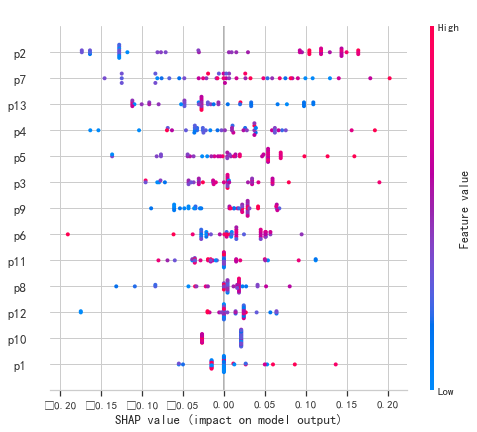

In [190]:
shap.summary_plot(shap_values[1],X)

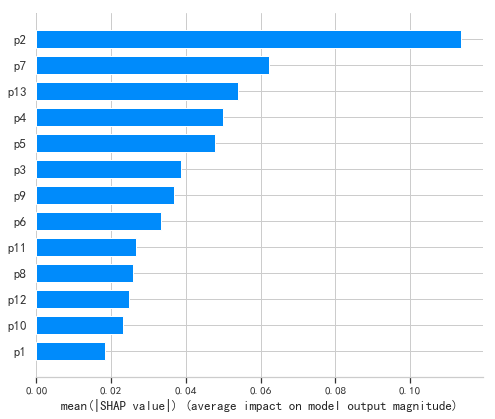

In [191]:
shap.summary_plot(shap_values[1],X,plot_type='bar')

In [184]:
from shap import initjs

In [185]:
initjs()

## xgboost

In [198]:
import xgboost

In [200]:
xgb=xgboost.train({'learning_rate':0.01},xgboost.DMatrix(X.values,label=y.values),100)

In [201]:
exp=shap.TreeExplainer(xgb)

In [202]:
vals=exp.shap_values(X.values)

In [204]:
shap.force_plot(explainer.expected_value[0],vals[0],X.iloc[0,:])

In [205]:
X.iloc[0,:]

p1    -3353.029679
p2     -637.199382
p3       -2.742705
p4      382.797824
p5       91.522595
p6     -151.378258
p7       92.498761
p8     -217.118082
p9     -246.751773
p10    -215.872710
p11    -190.563716
p12    -205.407198
p13      60.983085
Name: 0, dtype: float64

In [206]:
y[0]

0

In [212]:
data

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,diff_en
0,-3353.029679,-637.199382,-2.742705,382.797824,91.522595,-151.378258,92.498761,-217.118082,-246.751773,-215.872710,-190.563716,-205.407198,60.983085,0
1,-3256.378871,-290.568552,-81.970918,169.970870,-238.379637,11.203156,166.951764,-29.852274,-156.376550,72.599921,-323.792333,137.622299,29.046611,1
2,-3016.425838,12.025384,7.135266,117.181912,-38.854402,4.206552,183.017378,93.811746,-97.174620,-103.255191,-319.568076,75.566915,68.724154,0
3,-3088.051420,357.039219,-100.190485,279.971762,-66.402932,-63.153775,387.145997,87.355739,57.363745,-91.333298,-167.923933,-31.838709,-31.521093,0
4,-3429.184793,-543.293197,-278.063067,298.573775,103.901849,149.850279,49.449719,-9.394505,-184.742705,-83.111977,-105.861287,-101.372361,28.296802,-1
5,-3232.738262,-103.051056,-411.879870,117.590150,-73.263747,131.217368,182.082136,-64.495424,-121.514002,-7.552091,-66.775014,95.011521,-86.159910,1
6,-3054.064242,225.021149,-222.431122,42.182951,16.264437,112.104914,108.235577,-33.677382,-112.428000,-9.420396,-134.480664,89.402126,-78.782911,0
7,-3047.705129,585.630592,-74.468692,-17.983294,-49.490774,150.052131,275.664058,65.067676,61.788657,20.127807,-120.750262,-5.930208,-35.763579,0
8,-3253.137642,-358.784417,-50.318207,-123.532437,-123.761217,295.165816,-46.734564,-123.031732,-229.452065,114.544368,-85.471156,-71.107056,29.883890,-1
9,-3044.858364,18.631308,31.851993,-236.784754,-233.978552,179.399315,-148.505528,208.403152,-11.864896,93.637646,-23.883971,13.329966,-31.635964,1


In [214]:
xgb.

AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [ ]:
!pip install --upgrade "ipython[all]"